In [9]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebfit, cheb2poly
import sys
sys.path.insert(0, '../seal_wrapper/')
from seal_wrapper import EA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'EA'

In [ ]:
x = np.linspace(-19.9, 20.0, 400)
x

In [23]:
def relu(z):
    return np.maximum(0, z)

In [24]:
y = relu(x)

In [25]:
coeffs_cheb = chebfit(x, y, deg=4)

In [26]:
coeffs = cheb2poly(coeffs_cheb)
coeffs

array([ 1.75776367e+00,  4.99609371e-01,  2.73440538e-02,  1.01275961e-06,
       -1.51913942e-05])

In [27]:
data = x[:, None] ** np.arange(coeffs.shape[0])

In [28]:
relu_approx = data.dot(coeffs[:, None])

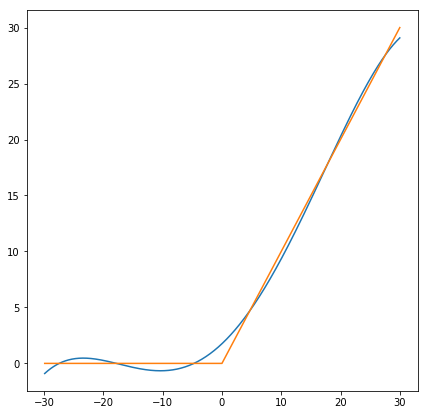

In [29]:
fig = plt.figure(figsize=(7, 7))
plt.plot(x, relu_approx)
plt.plot(x, y)

In [20]:
x_enc = EA(x[:, None], True)

In [21]:
x_relu = x_enc.relu()

In [ ]:
relu_vals = x_relu.values()

In [ ]:
fig = plt.figure(figsize=(7, 7))
plt.plot(x, relu_approx)
plt.plot(x, y)
plt.plot(x, relu_vals)